# Importação dos pacotes

In [ ]:
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
def plot_digits(X, target):

  n = X.shape[0]
  f, ax = plt.subplots(1, n)

  for i in range(0 , n):
    x = X[i].reshape(28, 28)

    ax[i].imshow(x, cmap="binary")
    ax[i].set_title('target: ' + target[i])
    ax[i].axis("off")

# Carregando os dados

In [ ]:
mnist = fetch_openml('mnist_784', as_frame=False)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [ ]:
X, y = mnist.data, mnist.target

exemplos das instâncias disponíveis na base de dados:

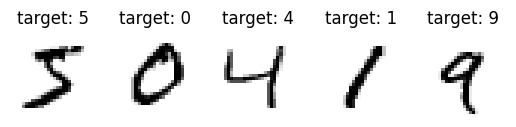

In [ ]:
plot_digits(X[0:5], y[0:5])

# Separando os conjutos de Treino e Teste

In [ ]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

# Treinando um modelo Random Forest

In [ ]:
forest_clf = RandomForestClassifier(random_state=42)
y_train_pred = cross_val_predict(forest_clf, X_train, y_train, cv=3)

avaliando o desempenho do modelo:

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)

In [ ]:
sample_weight = (y_train_pred != y_train)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, sample_weight=sample_weight, normalize="true", values_format=".0%")